In [1]:
import pandas as pd

In [2]:
import numpy as np

# 1) Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions. 

In [3]:
claims=pd.read_csv('claims.csv')

In [4]:
customer=pd.read_csv('cust_demographics.csv')

In [5]:
insurance=pd.merge(left=customer, right=claims, left_on='CUST_ID', right_on='customer_id', how='inner')
                   

In [6]:
insurance.shape

(1085, 16)

# 2) Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [7]:
insurance.dtypes

CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

In [8]:
insurance['DateOfBirth']=pd.to_datetime(insurance.DateOfBirth)

In [9]:
insurance.claim_date=pd.to_datetime(insurance.claim_date)

# 3) Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the dollar sign 

In [10]:
insurance.claim_amount=insurance.claim_amount.str.replace('$',"")

In [11]:
insurance.claim_amount.head(2)

0    2980
1    2980
Name: claim_amount, dtype: object

In [12]:
insurance.claim_amount=insurance.claim_amount.astype('float64')

In [13]:
insurance.claim_amount.head(2)

0    2980.0
1    2980.0
Name: claim_amount, dtype: float64

# 4)Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims. 

In [14]:
from numpy import where as IF

In [15]:
insurance.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No


In [16]:
police_report=insurance.police_report

In [17]:
alert_flag=IF(police_report=='No',1,0)
        

In [18]:
alert_flag

array([1, 0, 1, ..., 0, 1, 1])

In [19]:
insurance['Alert_Flag']=pd.Series(alert_flag)

In [20]:
insurance.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Alert_Flag
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,1
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0


# 5) One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique.Retain the most recent observation and delete any duplicated records in the data based on the customer ID column. 

In [21]:
del insurance['customer_id']

In [22]:
insurance.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Alert_Flag
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,1
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0


In [23]:
insurance = insurance.rename(columns={'CUST_ID':'customer_id'})

# 6)  Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical) 

In [24]:
insurance.head(2)

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Alert_Flag
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,1
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0


In [25]:
insurance.isnull().sum()

customer_id             0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
Alert_Flag              0
dtype: int64

In [26]:
insurance['claim_amount']=insurance.claim_amount.fillna(insurance.claim_amount.mean())

In [27]:
insurance['total_policy_claims']=insurance.total_policy_claims.fillna(insurance.total_policy_claims.mean())

# 7)Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria Children < 18 Youth 18-30 Adult 30-60 Senior > 60 

In [28]:
insurance['Age']=insurance.claim_date .dt.year-insurance.DateOfBirth.dt.year

In [29]:
Age=insurance['Age']

In [30]:
Age_Bin = IF((Age<18), 'Children',
   IF((Age>=18) & (Age<30) , 'Youth',
      IF((Age>=30) & (Age<60),'Adult',
         IF((Age>=60),'Senior','Invalid'))))

In [31]:
insurance['Age_Bin']=pd.Series(Age_Bin)

# 8) What is the average amount claimed by the customers from various segments? 

In [32]:
Average=insurance.groupby(by=['customer_id','Segment'])[['claim_amount']].mean().add_prefix("Average Of")

In [33]:
Average.head(2)

,,Average Ofclaim_amount
customer_id,Segment,
154557,Platinum,12467.681373
263204,Silver,39192.000000


# 10)How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 

In [34]:
insurance.loc[(insurance.State=='TX') | (insurance.State=='DE')  |  (insurance.State=='AK') 
               & (insurance.incident_cause =="Driver Error") & (insurance.Age_Bin=='Adult')].claim_amount.count()

51

# 11)Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.


In [35]:
import matplotlib

In [36]:
from matplotlib import pyplot as plt

In [37]:
pie_genseg=insurance.groupby(by=['Segment','gender'])[['claim_amount']].sum().reset_index()

In [38]:
pie_genseg.head(2)

,Segment,gender,claim_amount
0,Gold,Female,2.109738e+06
1,Gold,Male,2.701374e+06


In [39]:
pie_genseg=pie_genseg.pivot_table(index='gender',columns='Segment',values='claim_amount')

In [40]:
pie_genseg

Segment,Gold,Platinum,Silver
gender,,,
Female,2.109738e+06,2.369484e+06,1.901912e+06
Male,2.701374e+06,2.098303e+06,2.346624e+06


# 12)Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [41]:
male_female=insurance[insurance.incident_cause=='Driver error'].groupby(by=['incident_cause','gender'])[['gender']].count()

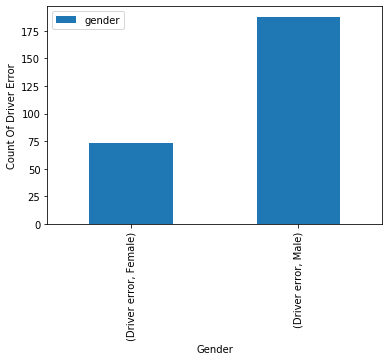

In [42]:
male_female.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count Of Driver Error')
plt.show()

# 13) Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart. 

In [43]:
insurance.head(2)

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Alert_Flag,Age,Age_Bin
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,1,38,Adult
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0,48,Adult


In [44]:
bar_fraudulent=insurance.loc[(insurance.fraudulent=='Yes')].Age_Bin.value_counts()


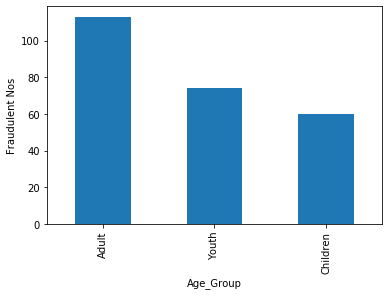

In [45]:
bar_fraudulent.plot(kind='bar')
plt.xlabel('Age_Group')
plt.ylabel('Fraudulent Nos')
plt.show()


# 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims. 

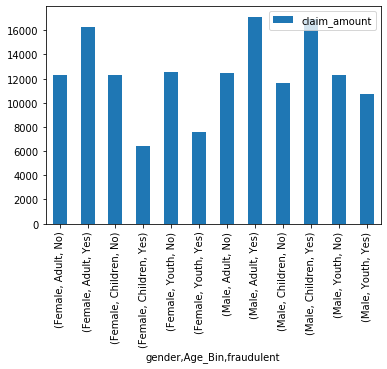

In [46]:
insurance.groupby(by=['gender','Age_Bin','fraudulent'])[['claim_amount']].mean().plot(kind='bar')
plt.show()

# Hypothesis Testing

# 16. Is there any similarity in the amount claimed by males and females? 

In [47]:
import scipy.stats as stats

In [48]:
amt_males = insurance[insurance['gender'] =='Male']
amt_females=insurance[insurance['gender'] =='Female']

In [49]:
stats.ttest_ind(amt_males.claim_amount,amt_females.claim_amount, equal_var=False) 

Ttest_indResult(statistic=0.9746136200857317, pvalue=0.3299696522030814)

# Since p-value is high we accept null i.e no similarity

# 17. Is there any relationship between age category and segment? 

In [50]:
contingency_table = pd.crosstab(insurance.Age_Bin, insurance.Segment, margins = True) 
stats.chi2_contingency(observed= contingency_table) 

(2.738074264923888,
 0.9737810707823497,
 9,
 array([[ 178.68663594,  172.4921659 ,  165.82119816,  517.        ],
        [  84.67741935,   81.74193548,   78.58064516,  245.        ],
        [ 111.6359447 ,  107.76589862,  103.59815668,  323.        ],
        [ 375.        ,  362.        ,  348.        , 1085.        ]]))

# p-value is high null accepted so there is no relationship b/w age category and segment

# 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000. 

In [51]:
insurance.columns

Index(['customer_id', 'gender', 'DateOfBirth', 'State', 'Contact', 'Segment',
       'claim_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'Alert_Flag', 'Age', 'Age_Bin'],
      dtype='object')

In [52]:
 stats.ttest_1samp(a= insurance.claim_amount, popmean= 10000) 

Ttest_1sampResult(statistic=6.082468636028012, pvalue=1.6383633097209731e-09)

# P-value low so alternate accepted i.e has shown a significant rise in claim amounts

# 19. Is there any difference between age groups and insurance claims? 

In [53]:
a1 = insurance.total_policy_claims[insurance['Age_Bin']=='Adult']
a2 = insurance.total_policy_claims[insurance['Age_Bin']=='Youth']
a3 = insurance.total_policy_claims[insurance['Age_Bin']=='Chidren']

In [54]:
stats.f_oneway(a1,a2,a3)

C:\Users\Prakhar\Anaconda3\lib\site-packages\scipy\stats\stats.py:3225: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / len(a)


F_onewayResult(statistic=nan, pvalue=nan)

# 20. Is there any relationship between total number of policy claims and the claimed amount?


In [55]:
 print(np.corrcoef(insurance.total_policy_claims, insurance.claim_amount)) 

[[ 1.         -0.01744856]
 [-0.01744856  1.        ]]


In [56]:
 print(stats.stats.pearsonr(insurance.total_policy_claims, insurance.claim_amount)) 

(-0.017448562393468956, 0.5658830110326771)


# No relationship between total number of policy claims and the claimed amount.